# Setup

In [119]:
# Imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download related imports
import os
import tarfile
import urllib.request

# Matplotlib settings
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output identical at every run
np.random.seed(42)

# Figure destination
PROJECT_ROOT_DIR = "."
ASSIGNMENT_ID = "diamonds"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", ASSIGNMENT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    This function saves the matplotlib figures.
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load the Data

In [120]:
def load_csv_data(file_path: str):
    """
    This function loads CSV (comma separated values) 
    data using the pandas library.

    ARGUMENTS
    ---------
        file_path (str):
            The `.csv` file destination path. 

    RETURNS
    -------
        Pandas `DataFrame` object containing all the data.
    """
    return pd.read_csv(file_path)

## Data Structure Analysis

In [121]:
diamonds = load_csv_data('datasets/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [122]:
# Check dataset dimensions
diamonds.shape

(53940, 11)

In [123]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Cleaning the Data

Discover and Visualize the Data to Gain Insights

In [124]:
# Remove the index column
diamonds.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [125]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Insight:** 
Min value of `x`, `y`, `z` are zero. This indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. We need to filter out these values.

In [127]:
# Dropping dimensionless diamonds (apparently it drops 20 data points)
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

Saving figure pairplot_before


<Figure size 432x288 with 0 Axes>

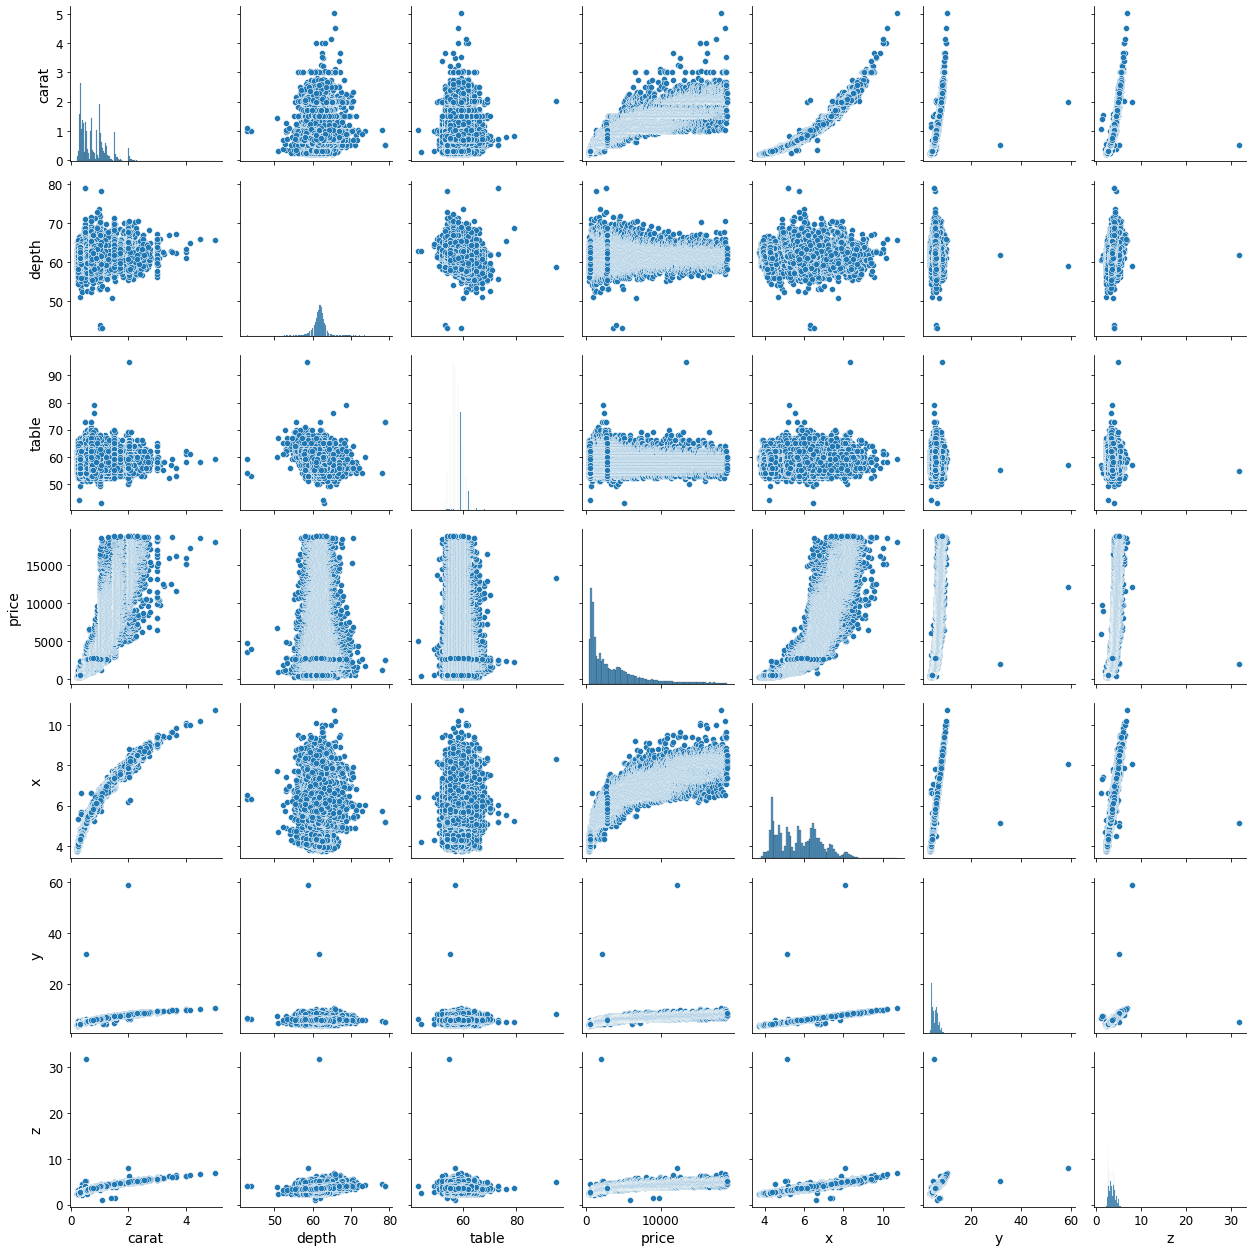

In [146]:
# Pairplot 
plt.suptitle("Pairplot",fontsize=18)
plt.tight_layout(pad=1)

sns.pairplot(diamonds, palette="rocket")
save_fig("pairplot_before")


**Insights:**
- `y` and `z` have some dimensional outlies in our dataset that needs to be eliminated.
- The `depth` should be capped but we must examine the regression line to be sure.
- The `table` featured should be capped too.

Looking at the regression plots gives a closer look at the outliers.


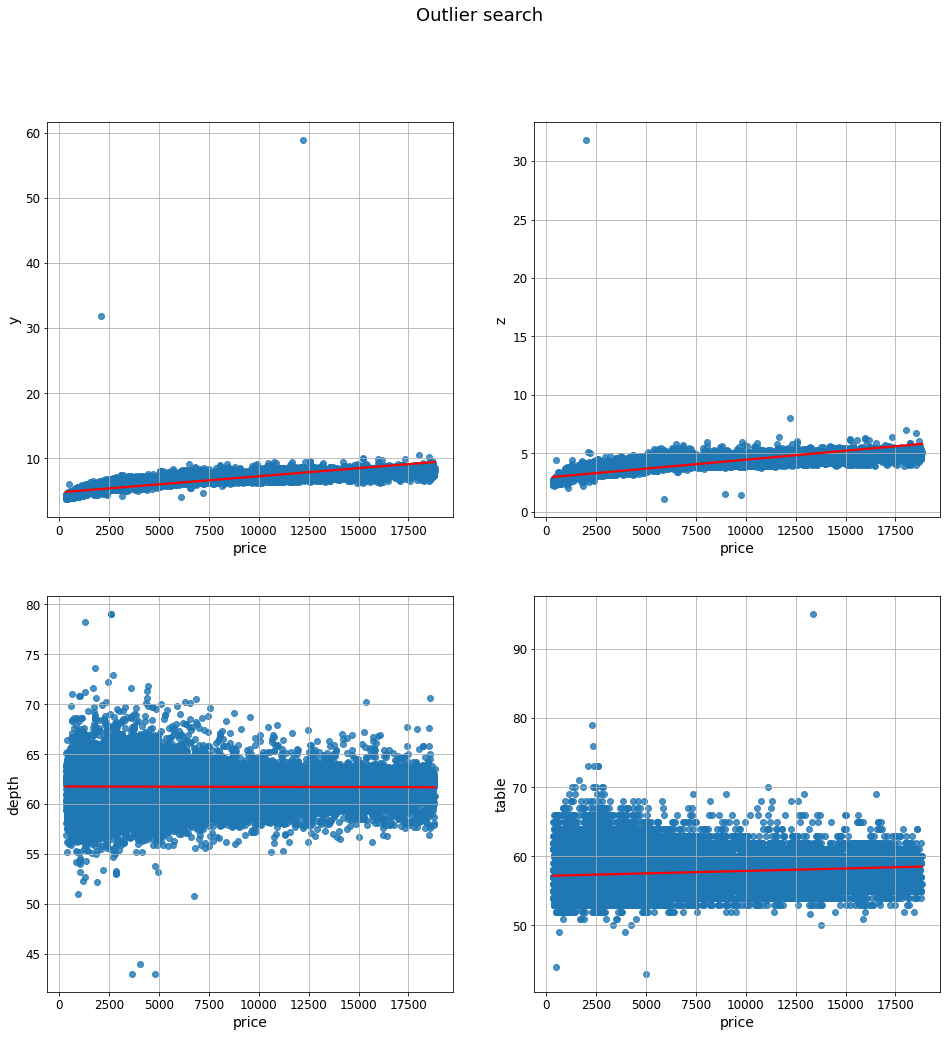

In [147]:
# Check intervals for outliers
plt.figure(figsize=(16,16))
plt.suptitle("Outlier search",fontsize=18)
plt.tight_layout(pad=1)

plt.subplot(2, 2, 1)
sns.regplot(x="price", y="y", data=diamonds, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 2)
sns.regplot(x="price", y="z", data=diamonds, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 3)
sns.regplot(x="price", y="depth", data=diamonds, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 4)
sns.regplot(x="price", y="table", data=diamonds, line_kws={"color": "red"})
plt.grid()

In [148]:
# Dropping the outliers. 
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["x"]<30)]
diamonds = diamonds[(diamonds["y"]<30)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]
diamonds.shape

(53907, 10)

Saving figure pairplot_after


<Figure size 432x288 with 0 Axes>

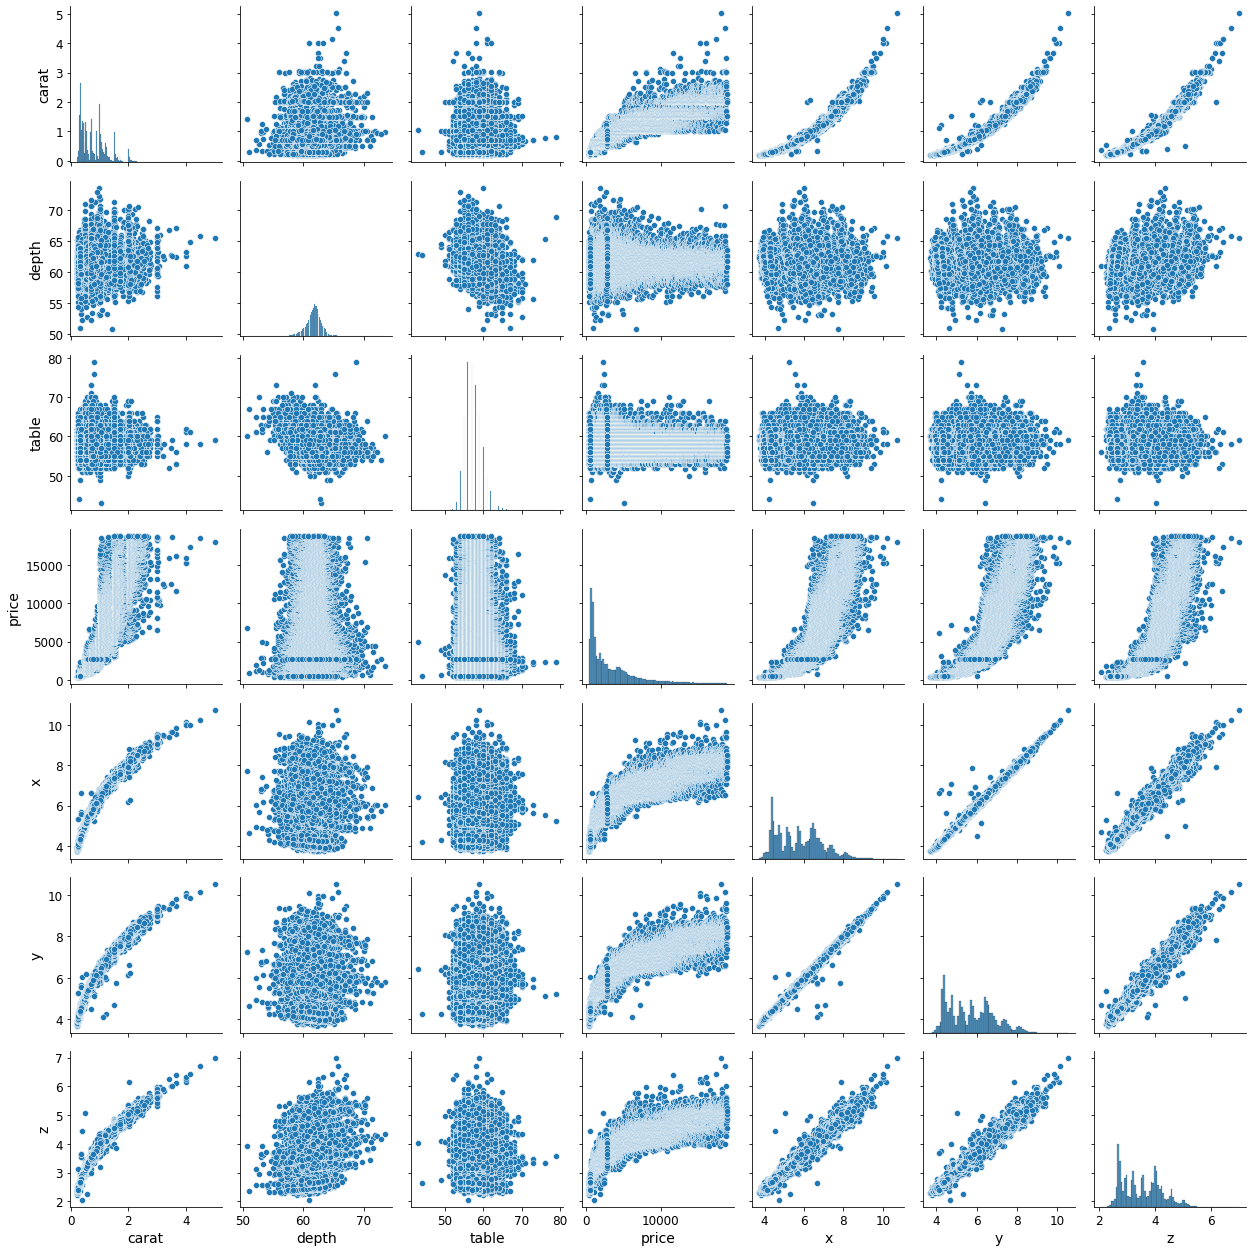

In [149]:
# Check pairplot after (price row)
plt.suptitle("Pairplot",fontsize=18)
plt.tight_layout(pad=1)

sns.pairplot(diamonds, palette="rocket")
save_fig("pairplot_after")

### Check the categorical values (indicated as `object` in the `.info()` method)

In [150]:
# Cut: The quality of the cut from Fair (Worst) to Ideal (Best) - Ideal cut stones will refract the most light.
diamonds["cut"].value_counts()

Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: cut, dtype: int64

In [151]:
# Color: a measurement from Colorless (Best) to Slightly Tinted (Worst) [D-J]
diamonds["color"].value_counts()

G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: color, dtype: int64

In [152]:
# Clarity: a measurement of how clear the diamond is [I1 - IF]
diamonds["clarity"].value_counts()

SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: clarity, dtype: int64

#### Counts from worst to best category (ordered)


Saving figure clarity_count


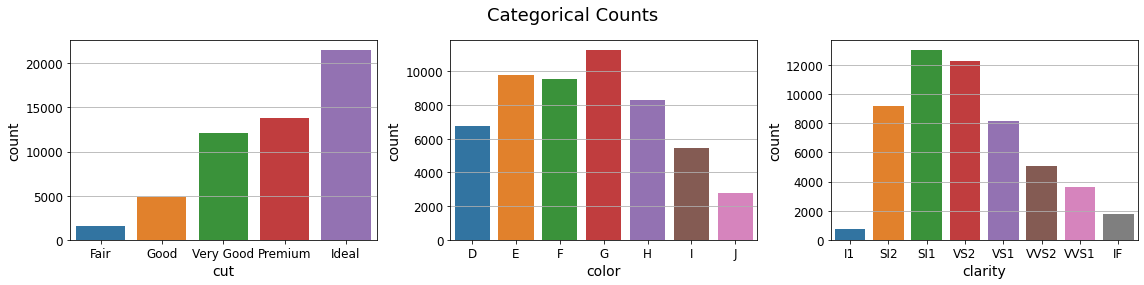

In [153]:
plt.figure(figsize=(16,4))
plt.suptitle("Categorical Counts",fontsize=18)
plt.tight_layout(pad=1)


plt.subplot(1, 3, 1)
sns.countplot(x=diamonds["cut"], order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.grid(axis='y')
plt.subplot(1, 3, 2)
sns.countplot(x=diamonds["color"], order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.grid(axis='y')
plt.subplot(1, 3, 3)
sns.countplot(x=diamonds["clarity"], order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.grid(axis='y')

save_fig("clarity_count")

Saving figure attribute_histogram_plots


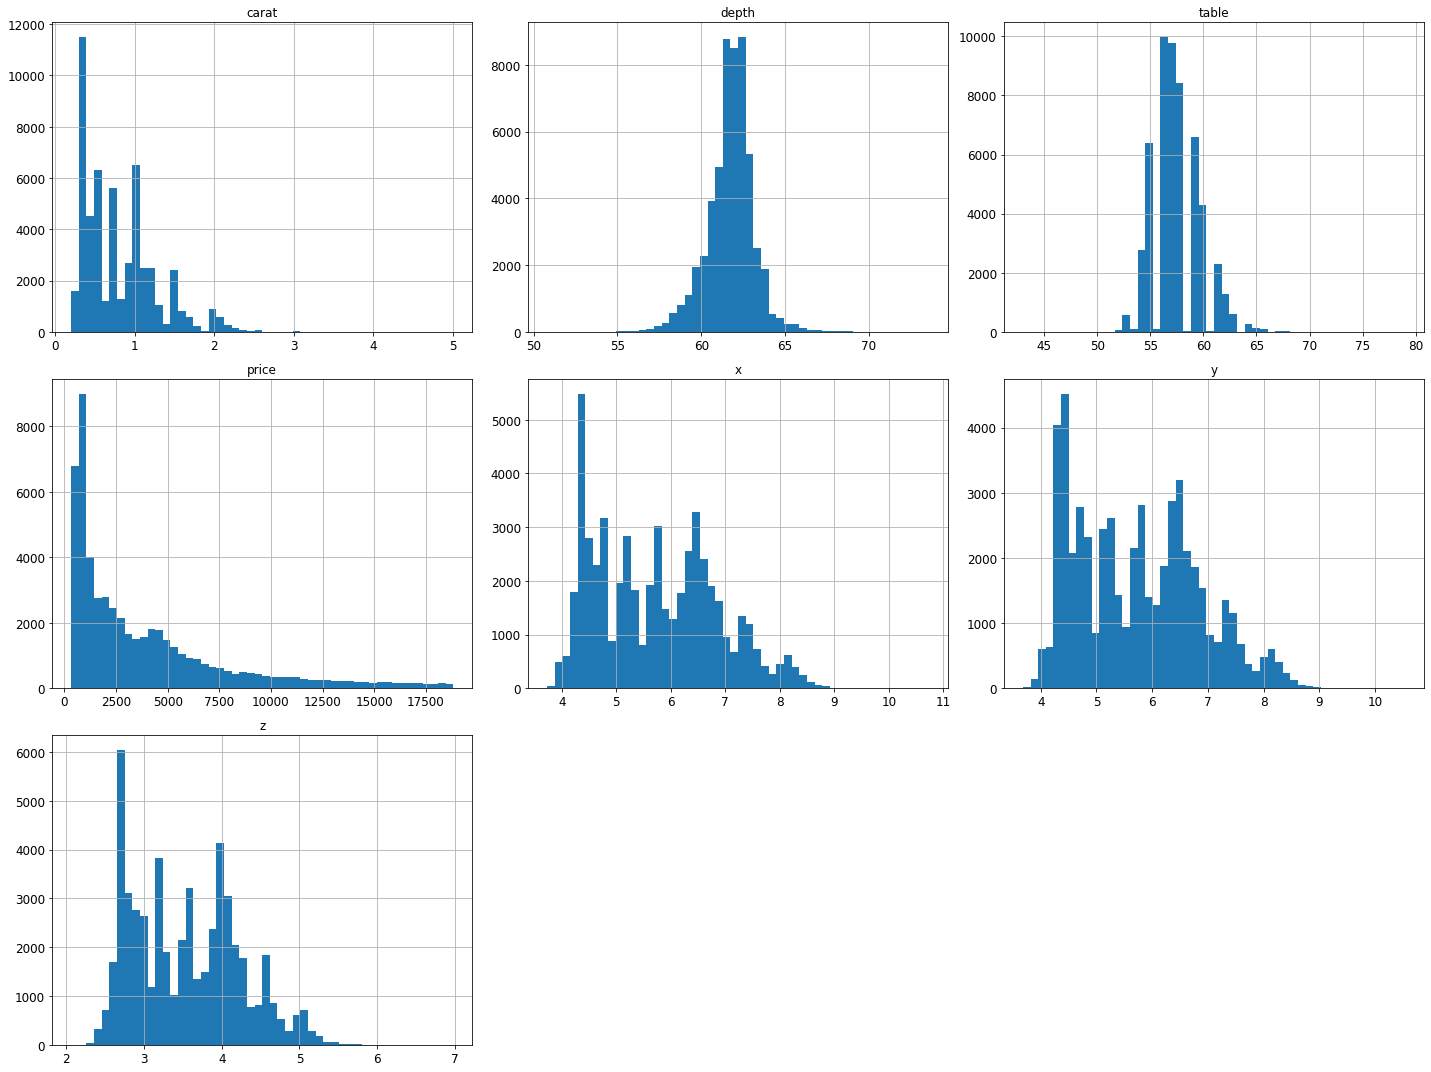

In [154]:
diamonds.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Correlational data

In [162]:
corr_matrix = diamonds.corr()

In [163]:
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921590
y        0.888807
x        0.887212
z        0.882634
table    0.127108
depth   -0.010287
Name: price, dtype: float64

Saving figure correlation_heatmap


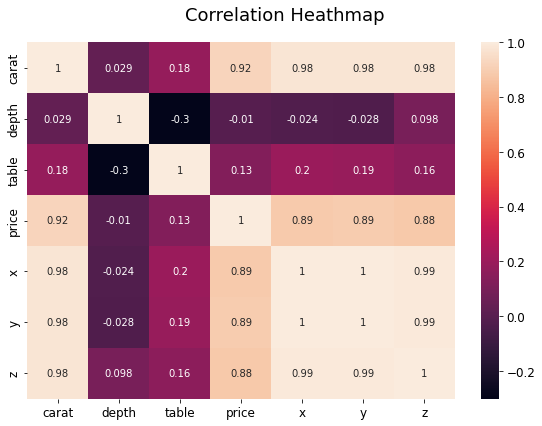

In [164]:
plt.figure(figsize=(8,6))
plt.suptitle("Correlation Heathmap",fontsize=18)

sns.heatmap(corr_matrix ,annot=True, cbar=True)
save_fig("correlation_heatmap")


### Category relationships with Price ($)

Since the relationship of categorical values are not plotted on the heatmap above, we plot it separately for the target (price).

Saving figure cat_price_relationship


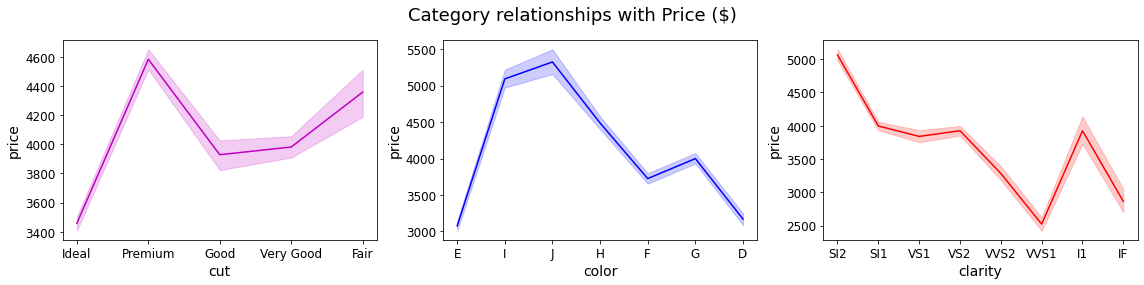

In [95]:
plt.figure(figsize=(16,4))
plt.suptitle("Category relationships with Price ($)",fontsize=18)
plt.tight_layout(pad=1)

plt.subplot(1, 3, 1)
sns.lineplot(data=diamonds,x='cut',y='price',color='m',)
plt.subplot(1, 3, 2)
sns.lineplot(data=diamonds,x='color',y='price',color='blue')
plt.subplot(1, 3, 3)
sns.lineplot(data=diamonds,x='clarity',y='price',color='red')

save_fig("cat_price_relationship")

In [161]:
# Check statistical values again after the cleaning process
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# Model Building

In [176]:
# model building imports
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Regression model imports
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# metrics and validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Lable encoding the data to get rid of `object` dtype.

In [167]:
# Get list of categorical variables
objects = (diamonds.dtypes =="object")

object_cols = list(objects[objects].index)
print(f"Categorical variables:\n {object_cols}")

# Make copy to avoid changing original data 
training_data = diamonds.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in object_cols:
    training_data[col] = label_encoder.fit_transform(training_data[col])

# check the trainsformation
training_data.head()

Categorical variables:
 ['cut', 'color', 'clarity']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [168]:
# Features are stored in the `X` variable and labels are variable `y`.
X= training_data.drop(["price"],axis =1)
y= training_data["price"]

In [169]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set length: {len(X_train)}\nTesting set length: {len(X_test)}")

Training set length: 43125
Testing set length: 10782


In [171]:
# Building pipelines of standard scalers and various regression models.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [173]:
# Creating a list of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

### **Training** (Fit the models to the diamonds dataset)

In [174]:
for model in pipelines:
    model.fit(X_train, y_train)

### Cross-validate the model results

In [175]:
cv_results_rms = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(
        model, X_train,y_train, scoring="neg_root_mean_squared_error", cv=10
    )
    cv_results_rms.append(cv_score)
    print("%s: %f " % ( pipe_dict[i], cv_score.mean() ))

LinearRegression: -1344.867308 
DecisionTree: -754.128268 
RandomForest: -548.706041 
KNeighbors: -812.733542 
XGBRegressor: -546.321475 


### Test the best scoring model on the testing set

XGB Regressor appears to be the best performing model for this dataset.

In [177]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

# Model Evaluation
print("R^2:", r2_score(y_test, pred))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R^2: 0.9811796298930303
Adjusted R^2: 0.9811639054842889
MAE: 273.96182782104694
MSE: 285838.1615757297
RMSE: 534.6383465256955


**Final thoughts:** The R^2 score of the best performing model is close to 1, so it's predictions are pretty accurate (close enough may depend on the utilization goals).